# **1. Importing important libraries and loading dataset**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("dataset_kaggle.csv")


In [ ]:
data.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,lp001002,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,lp001003,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,lp001005,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,lp001006,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,lp001008,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


# **2. Understanding the data**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   loan_id            614 non-null    object 
 1   gender             601 non-null    object 
 2   married            611 non-null    object 
 3   dependents         599 non-null    object 
 4   education          614 non-null    object 
 5   self_employed      582 non-null    object 
 6   applicantincome    614 non-null    int64  
 7   coapplicantincome  614 non-null    float64
 8   loanamount         592 non-null    float64
 9   loan_amount_term   600 non-null    float64
 10  credit_history     564 non-null    float64
 11  property_area      614 non-null    object 
 12  loan_status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
data.shape

(614, 13)

In [ ]:
data.describe()

,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# **3. Data Visualization**

<ipython-input-7-2c8e55612e4a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix = data.corr()


<Axes: >

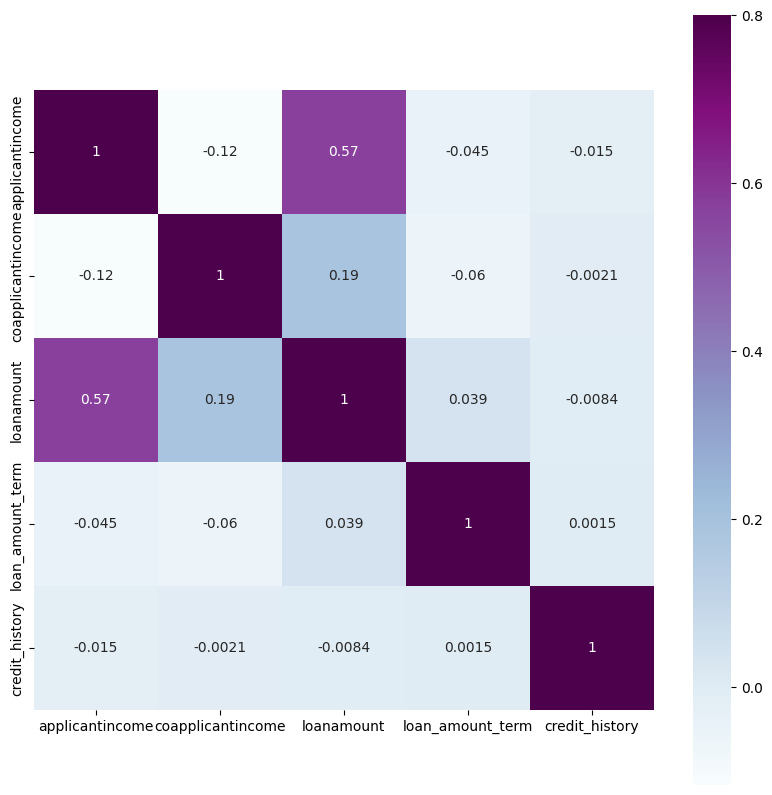

In [ ]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu", annot = True)

**Maximum correlation found between column loan amount and coapplicant income and also between loan amount and loan amount term columns.**

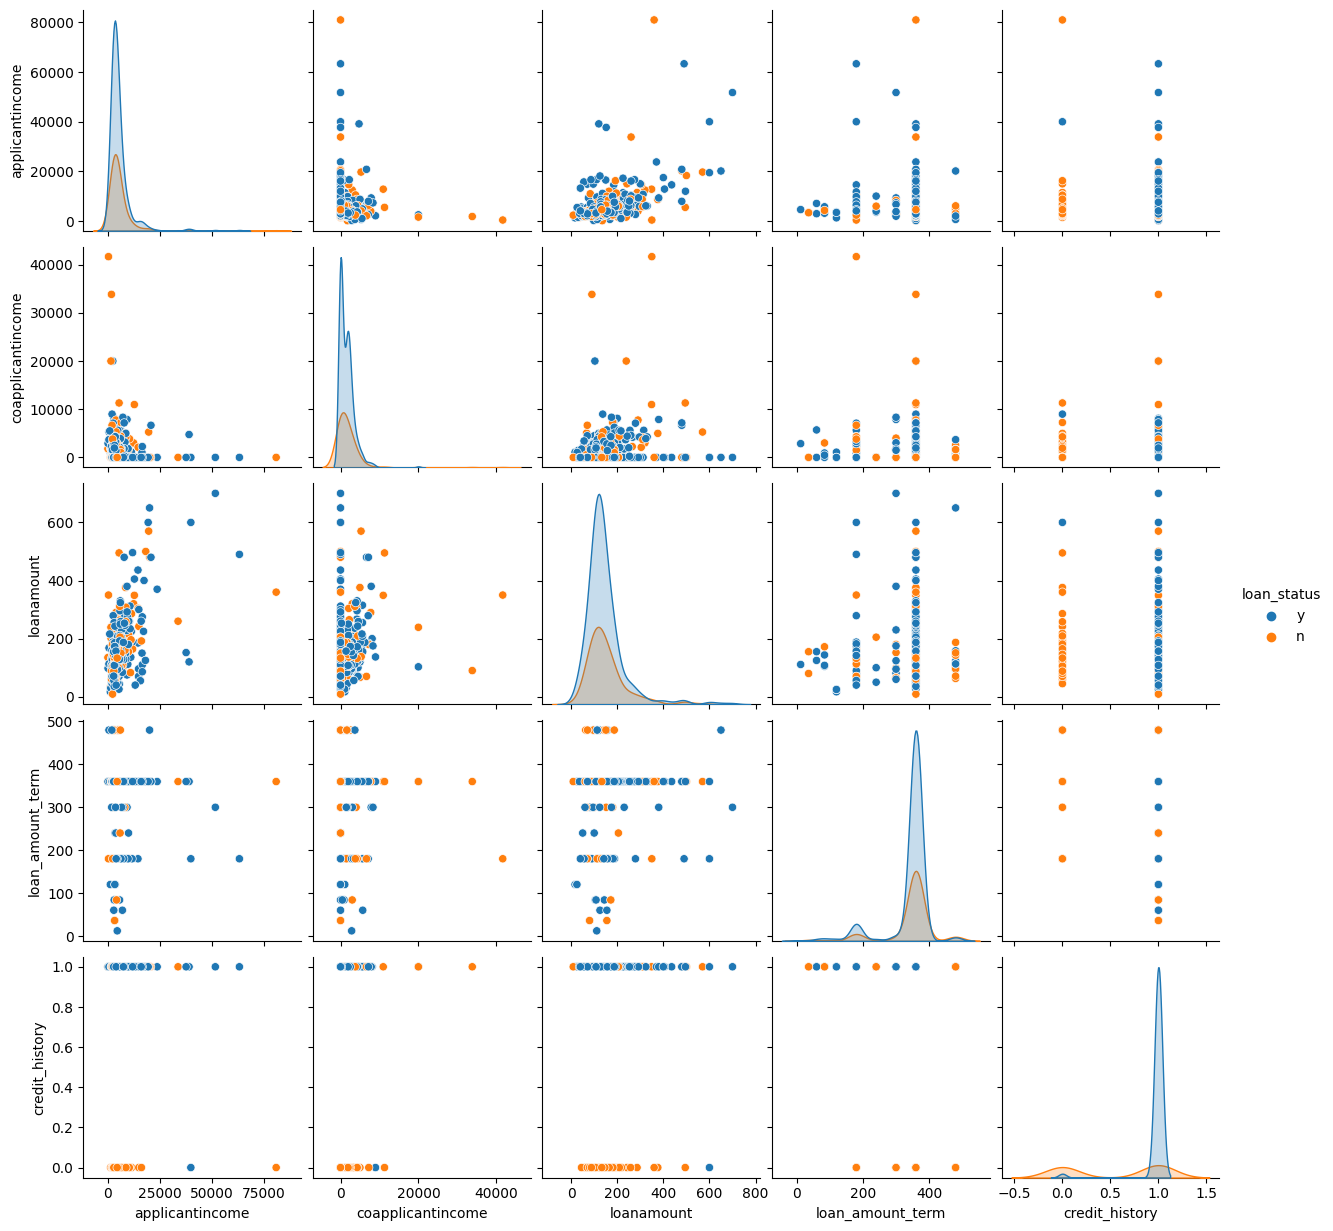

In [ ]:
sns.pairplot(data=data, hue='loan_status')

<Axes: >

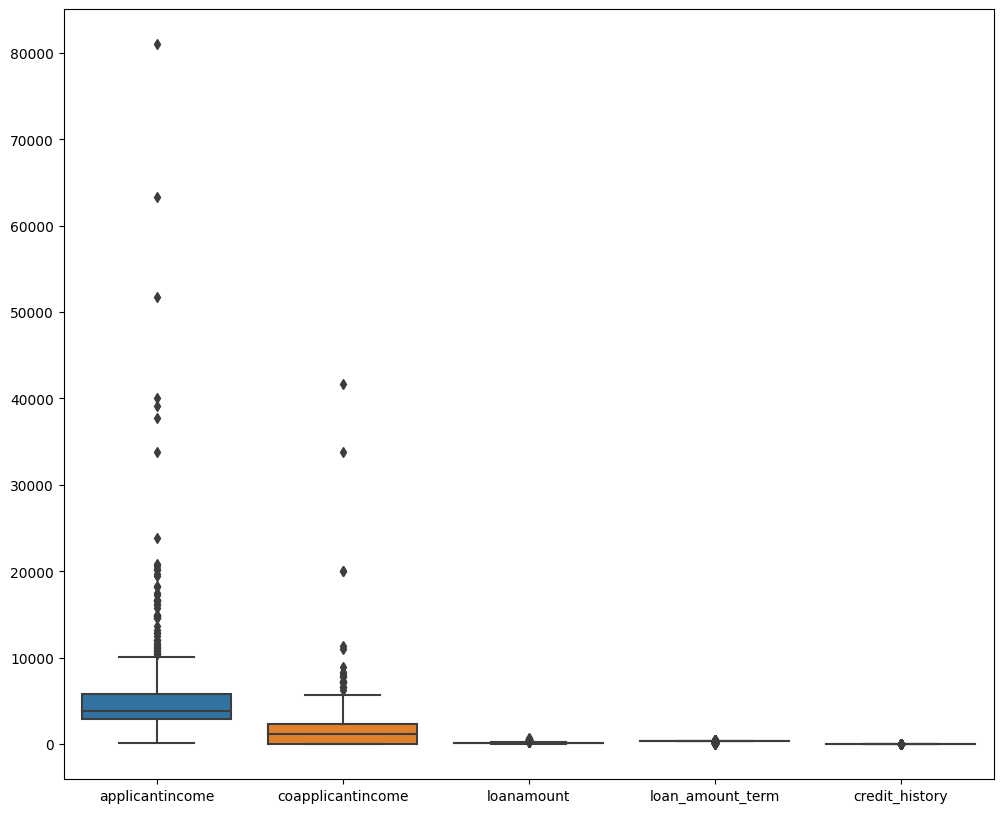

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(data)

In [ ]:
# Dropping Loan_ID column
data.drop(['loan_id'],axis=1,inplace=True)


In [ ]:
obj = (data.dtypes == 'object')
print("Categorical variables:",len(list(obj[obj].index)))

Categorical variables: 7


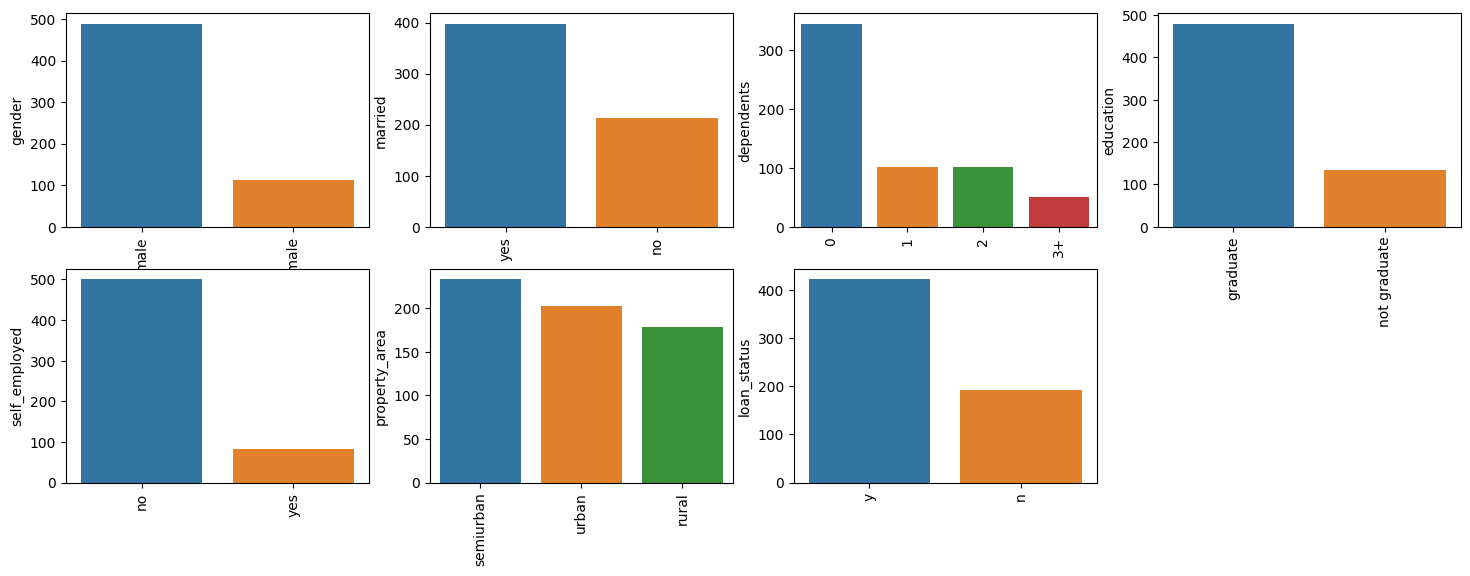

In [ ]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize=(18,36))
index = 1

for col in object_cols:
  y = data[col].value_counts()
  plt.subplot(11,4,index)
  plt.xticks(rotation=90)
  sns.barplot(x=list(y.index), y=y)
  index +=1


In [ ]:
import plotly.express as px
fig = px.sunburst(data, path=['loan_status', 'property_area','education'], values='loanamount')
fig.show()

In [ ]:
# Replace dependent '3+' with '3'
data.replace(to_replace='3+', value='3', inplace=True)
data.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,male,no,0,graduate,no,5849,0.0,NaN,360.0,1.0,urban,y
1,male,yes,1,graduate,no,4583,1508.0,128.0,360.0,1.0,rural,n
2,male,yes,0,graduate,yes,3000,0.0,66.0,360.0,1.0,urban,y
3,male,yes,0,not graduate,no,2583,2358.0,120.0,360.0,1.0,urban,y
4,male,no,0,graduate,no,6000,0.0,141.0,360.0,1.0,urban,y


# **4. Handling Null Values**

In [ ]:
data.isna().sum()

gender               13
married               3
dependents           15
education             0
self_employed        32
applicantincome       0
coapplicantincome     0
loanamount           22
loan_amount_term     14
credit_history       50
property_area         0
loan_status           0
dtype: int64

In [ ]:
#handling null values with median
data['applicantincome'] = data['applicantincome'].fillna(data['applicantincome'].median())
data['coapplicantincome'] = data['coapplicantincome'].fillna(data['coapplicantincome'].median())
data['loanamount'] = data['loanamount'].fillna(data['loanamount'].median())
data['loan_amount_term'] = data['loan_amount_term'].fillna(data['loan_amount_term'].median())

In [ ]:
#handling categorical variables with mode
data['gender'] = data['gender'].fillna(data['gender'].mode()[0])
data['married'] = data['married'].fillna(data['married'].mode()[0])
data['self_employed'] = data['self_employed'].fillna(data['self_employed'].mode()[0])
data['credit_history'] = data['credit_history'].fillna(data['credit_history'].mode()[0])
data['dependents'] = data['dependents'].fillna(data['dependents'].mode()[0])
data.isna().sum()

gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

<Axes: >

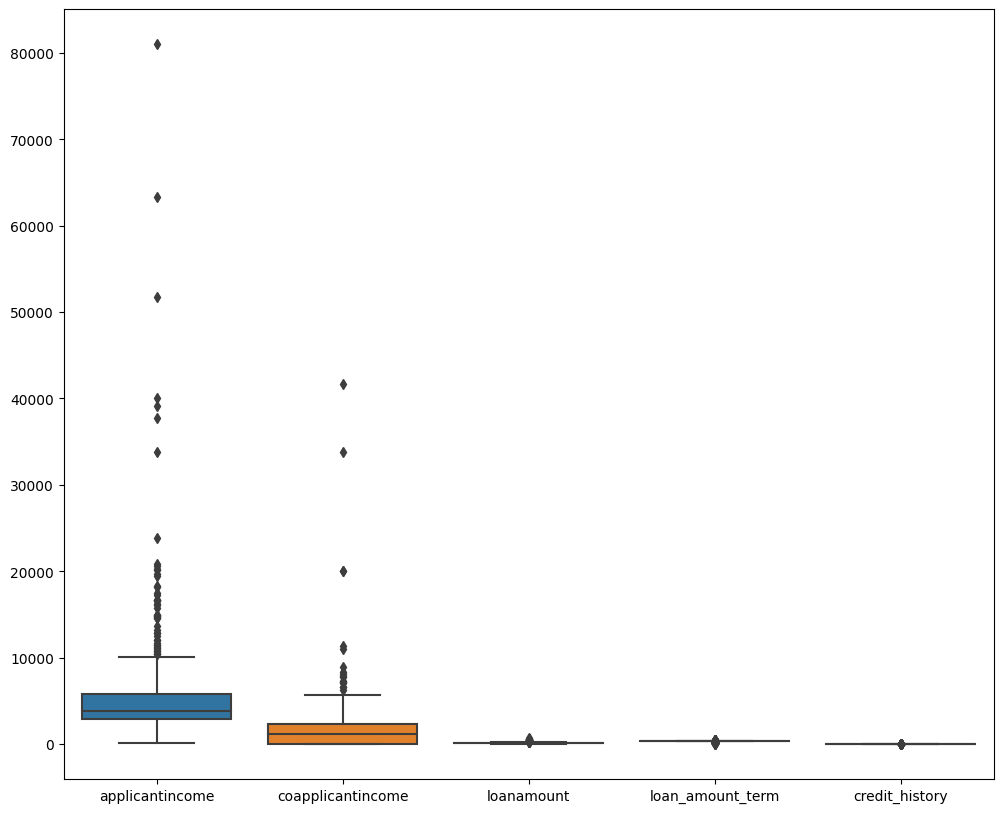

In [ ]:
plt.figure(figsize=(12,10))
sns.boxplot(data)


In [ ]:
cat=data.select_dtypes('object').columns.tolist()
cat

['gender',
 'married',
 'dependents',
 'education',
 'self_employed',
 'property_area',
 'loan_status']

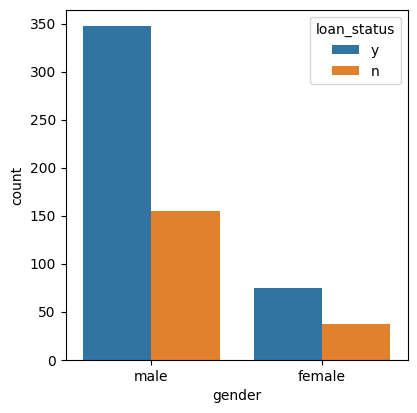

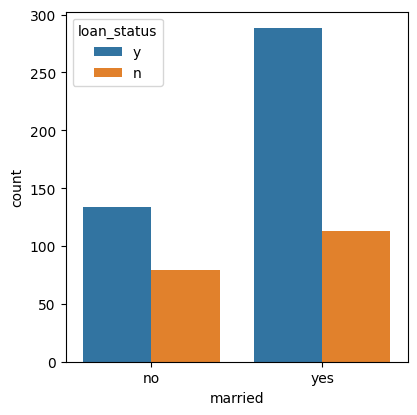

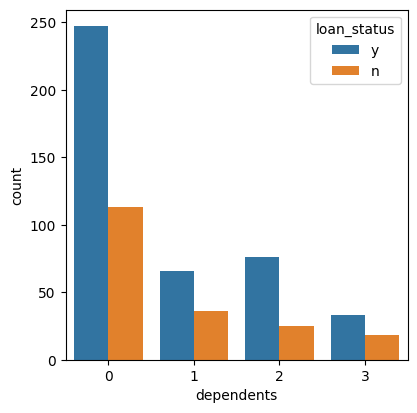

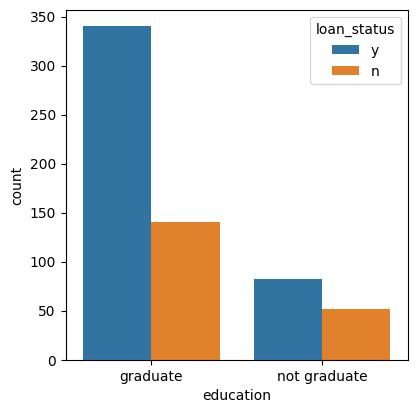

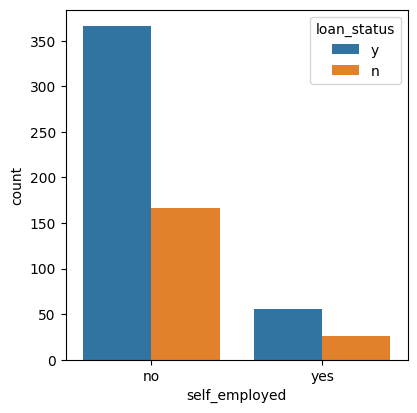

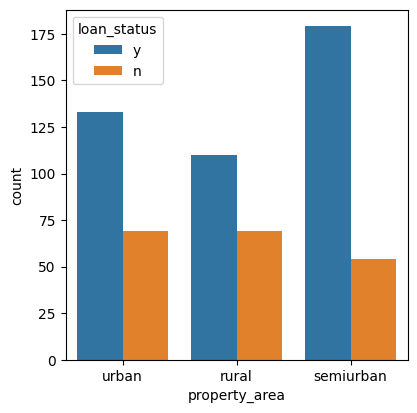

In [ ]:
for i in cat[:-1]:
 plt.figure(figsize = (15,10))
 plt.subplot(2,3,3)
 sns.countplot(x =i, hue = 'loan_status', data = data)

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how
# to understand word labels.
label_encoder = preprocessing.LabelEncoder()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
  data[col] = label_encoder.fit_transform(data[col])


In [ ]:
data.head()


,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [ ]:
for col in list(obj[obj].index):
  print(f"{col}: {data[col].unique()}")
print(data['loan_amount_term'].unique())

gender: [1 0]
married: [0 1]
dependents: [0 1 2 3]
education: [0 1]
self_employed: [0 1]
property_area: [2 0 1]
loan_status: [1 0]
[360. 120. 240. 180.  60. 300. 480.  36.  84.  12.]


In [ ]:
data.head(n=10)

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1
6,1,1,0,1,0,2333,1516.0,95.0,360.0,1.0,2,1
7,1,1,3,0,0,3036,2504.0,158.0,360.0,0.0,1,0
8,1,1,2,0,0,4006,1526.0,168.0,360.0,1.0,2,1
9,1,1,1,0,0,12841,10968.0,349.0,360.0,1.0,1,0


<ipython-input-25-1bb4e4689b73>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-25-1bb4e4689b73>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-25-1bb4e4689b73>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use ei

<Axes: xlabel='loanamount', ylabel='Density'>

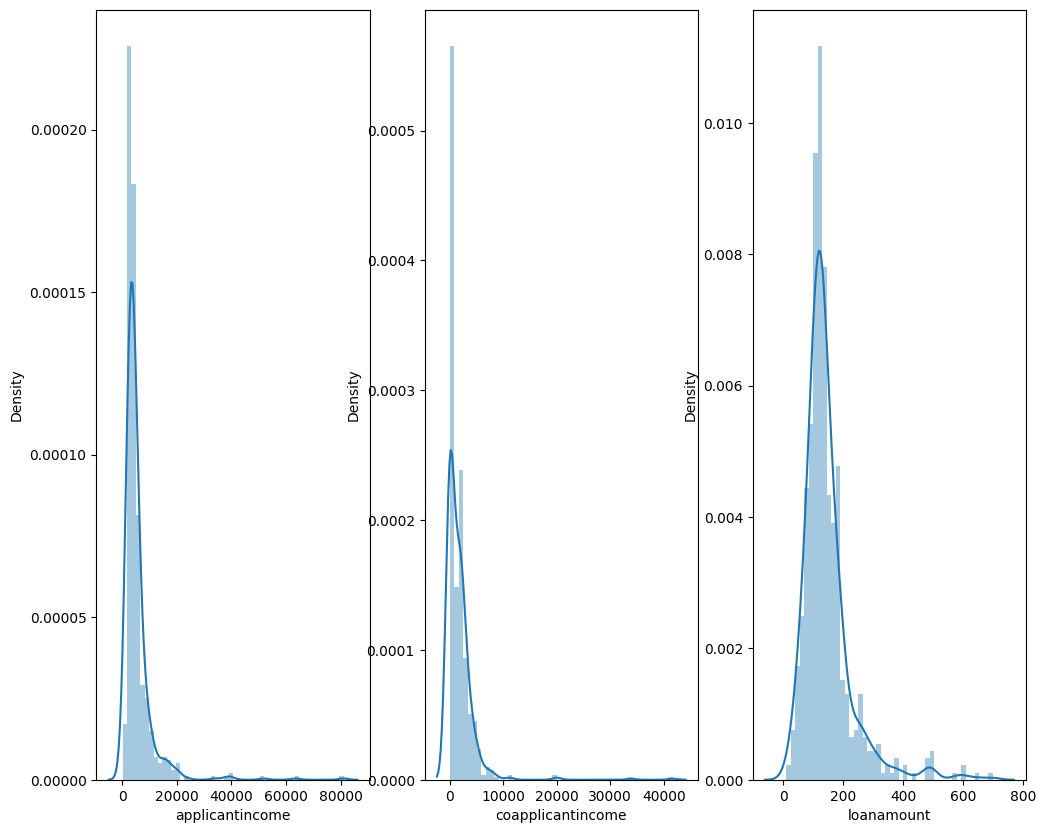

In [ ]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1)
sns.distplot(data['applicantincome'])
plt.subplot(1,3,2)
sns.distplot(data['coapplicantincome'])
plt.subplot(1,3,3)
sns.distplot(data['loanamount'])

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Applicant income and co-applicant income do not exhibit a normal distribution. To achieve a more normal distribution, a log Normal transformation isapplied to the income variables.

In [ ]:
''' Detection outer for coapplicantincome'''
# IQR
# Calculate the upper and lower limits
Q1 = data['applicantincome'].quantile(0.25)
Q3 = data['applicantincome'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['applicantincome'] >= upper)[0]
print("No. of the upper bound outliner",len(upper_array))
lower_array = np.where(data['applicantincome'] <= lower)[0]
print("No. of the lower bound outliner",len(lower_array))
# Removing the outliers
new_data = data[data['applicantincome'] < upper]
new_data.shape

No. of the upper bound outliner 50
No. of the lower bound outliner 0


(564, 12)

In [ ]:
''' Detection outer for coapplicantincome'''
# IQR
# Calculate the upper and lower limits
Q1 = data['coapplicantincome'].quantile(0.25)
Q3 = data['coapplicantincome'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(upper)

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(data['coapplicantincome'] >= upper)[0]
print("No. of the upper bound outliner",(upper_array))
lower_array = np.where(data['coapplicantincome'].values<= lower)[0]
print("No. of the lower bound outliner",len(lower_array))
# Removing the outliers
new_data = data[data['coapplicantincome'] < upper]
new_data.shape

5743.125
No. of the upper bound outliner [  9  12  38 122 135 177 180 253 349 372 402 417 444 506 513 523 581 600]
No. of the lower bound outliner 0


(596, 12)

In [ ]:
data.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# **Check if the Label 'Status' is balanced or not**

1    422
0    192
Name: loan_status, dtype: int64

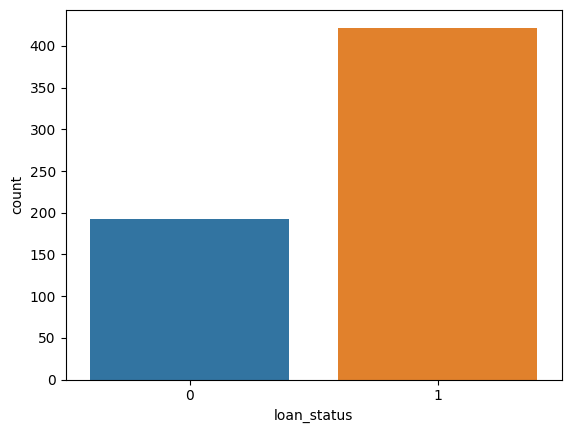

In [ ]:
sns.countplot(x='loan_status',data=data)
data['loan_status'].value_counts()

# Oversampling Minority Class to balance the Label


In [ ]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class
data_majority = data[(data['loan_status']==1)]
data_minority = data[(data['loan_status']==0)]
# upsample minority class
data_minority_upsampled = resample(data_minority,
                                 replace=True,    # sample with replacement
                                 n_samples= 422, # to match majority class
                                 random_state=0)  # reproducible results
# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_minority_upsampled, data_majority])

0    422
1    422
Name: loan_status, dtype: int64

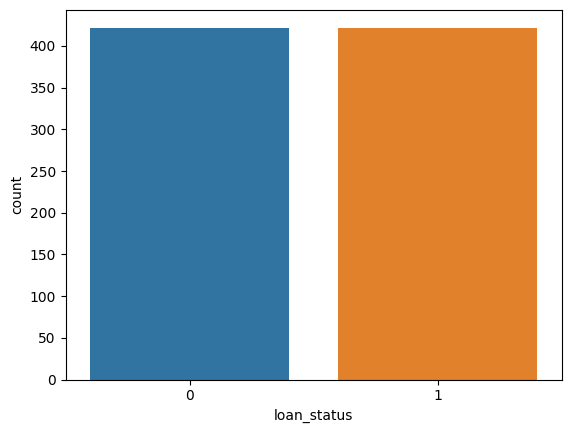

In [ ]:
sns.countplot(x='loan_status',data=data_upsampled)
data_upsampled['loan_status'].value_counts()

# Remove Outlier using IQR

In [ ]:
data_upsampled.shape

(844, 12)

In [ ]:
# specify the columns to remove outliers from dataframe
column_names = ['applicantincome', 'coapplicantincome']

# remove outliers for each selected column using the IQR method
for column_name in column_names:
    Q1 = data_upsampled[column_name].quantile(0.25)
    Q3 = data_upsampled[column_name].quantile(0.75)
    IQR = Q3 - Q1
    data_upsampled = data_upsampled[~((data_upsampled[column_name] < (Q1 - 1.5 * IQR)) | (data_upsampled[column_name] > (Q3 + 1.5 * IQR)))]

data_upsampled.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
554,1,1,0,0,0,3593,4266.0,132.0,180.0,0.0,0,0
148,0,0,0,0,0,10000,1666.0,225.0,360.0,1.0,0,0
378,1,0,0,0,0,3069,0.0,71.0,480.0,1.0,2,0
202,1,1,3,1,0,3992,0.0,128.0,180.0,1.0,2,0
338,0,0,3,1,0,1830,0.0,128.0,360.0,0.0,2,0


In [ ]:
#Check the shape after outlier removal
data_upsampled.shape

(747, 12)

In [ ]:
data_upsampled['loan_status'].value_counts()

1    380
0    367
Name: loan_status, dtype: int64

In [ ]:
data_upsampled.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
554,1,1,0,0,0,3593,4266.0,132.0,180.0,0.0,0,0
148,0,0,0,0,0,10000,1666.0,225.0,360.0,1.0,0,0
378,1,0,0,0,0,3069,0.0,71.0,480.0,1.0,2,0
202,1,1,3,1,0,3992,0.0,128.0,180.0,1.0,2,0
338,0,0,3,1,0,1830,0.0,128.0,360.0,0.0,2,0


# **Spliting the Dataset**

In [ ]:
from sklearn.model_selection import train_test_split

x = new_data.drop(['loan_status'],axis=1)
y = new_data['loan_status']
x.shape,y.shape

X_train, X_test, Y_train, Y_test = train_test_split(x, y,
													test_size=0.25,
													random_state=42)
print("X_train shape :",X_train.shape)
print("X_test shape :",X_test.shape)
print("Y_train shape :",Y_train.shape)
print("Y_test shape :",Y_test.shape)

X_train shape : (447, 11)
X_test shape : (149, 11)
Y_train shape : (447,)
Y_test shape : (149,)


# **Applying Models**

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
svc = SVC()
lc = LogisticRegression()
dt = DecisionTreeClassifier()
# making predictions on the training set
for clf in (rfc, knn, svc,lc,dt):
	clf.fit(X_train, Y_train)
	Y_pred = clf.predict(X_test)
	print("Accuracy score of ",		clf.__class__.__name__,		"=",100*accuracy_score(Y_test,Y_pred))
	print(classification_report(Y_test,Y_pred))

Accuracy score of  RandomForestClassifier = 75.83892617449665
              precision    recall  f1-score   support

           0       0.88      0.41      0.56        56
           1       0.73      0.97      0.83        93

    accuracy                           0.76       149
   macro avg       0.81      0.69      0.70       149
weighted avg       0.79      0.76      0.73       149

Accuracy score of  KNeighborsClassifier = 61.07382550335571
              precision    recall  f1-score   support

           0       0.45      0.16      0.24        56
           1       0.64      0.88      0.74        93

    accuracy                           0.61       149
   macro avg       0.54      0.52      0.49       149
weighted avg       0.57      0.61      0.55       149

Accuracy score of  SVC = 62.41610738255034
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        56
           1       0.62      1.00      0.77        93

    accuracy     

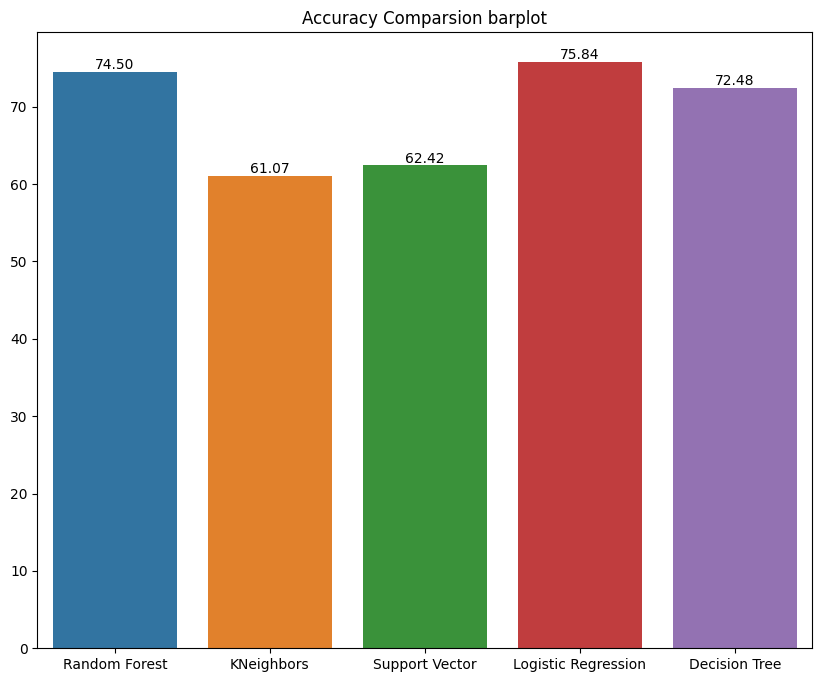

In [ ]:
rfc.fit(X_train, Y_train)
Y_pred_rfc = rfc.predict(X_test)
rfc_acc= 100*accuracy_score(Y_test,Y_pred_rfc)

knn.fit(X_train, Y_train)
Y_pred_knn = knn.predict(X_test)
knn_acc= 100*accuracy_score(Y_test,Y_pred_knn)

svc.fit(X_train, Y_train)
Y_pred_svc = svc.predict(X_test)
svc_acc= 100*accuracy_score(Y_test,Y_pred_svc)

lc.fit(X_train, Y_train)
Y_pred_lc = lc.predict(X_test)
lc_acc= 100*accuracy_score(Y_test,Y_pred_lc)

dt.fit(X_train, Y_train)
Y_pred_dt = dt.predict(X_test)
dt_acc= 100*accuracy_score(Y_test,Y_pred_dt)


d1 = {"Results": [rfc_acc,knn_acc,svc_acc,lc_acc,dt_acc],
        "Names": ['Random Forest', 'KNeighbors', 'Support Vector','Logistic Regression','Decision Tree']}
plt.figure(figsize=(10, 8))
sns.barplot(x="Names", y="Results", data= d1)

for i, v in enumerate(d1['Results']):
    plt.annotate(format((v), '.2f'), xy=(i, v), ha='center', va='bottom')

# Setting the title for the graph
plt.title("Accuracy Comparsion barplot")

# Finally showing the plot
plt.show()

In [ ]:
pred1=[Y_pred_rfc,Y_pred_knn,Y_pred_svc,Y_pred_lc,Y_pred_dt]
from sklearn.metrics import confusion_matrix


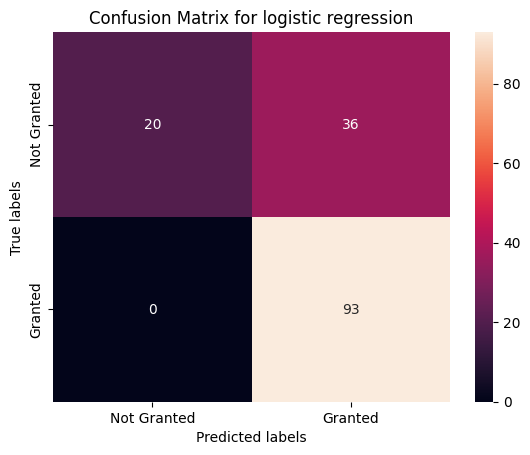

In [ ]:
cm = confusion_matrix(Y_test, Y_pred_lc)
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix for logistic regression');
ax.xaxis.set_ticklabels(['Not Granted','Granted']); ax.yaxis.set_ticklabels(['Not Granted','Granted']);

# **Hyperparameter Tuning for RandomForest and Decision Tree**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {
    'n_estimators': [25, 50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [3, 6, 9],
    'max_leaf_nodes': [3, 6, 9],
}
grid_search = GridSearchCV(RandomForestClassifier(),
                           param_grid=param_grid)
grid_search.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 6, 9],
                         'max_features': ['sqrt', 'log2', None],
                         'max_leaf_nodes': [3, 6, 9],
                         'n_estimators': [25, 50, 100, 150]})

In [ ]:
print(grid_search.best_estimator_)

RandomForestClassifier(max_depth=3, max_leaf_nodes=3)


In [ ]:
rfc1 = RandomForestClassifier(max_depth=3, max_leaf_nodes=3, n_estimators=25)
rfc1.fit(X_train, Y_train)
Y_pred = rfc1.predict(X_test)
acc_rfc1=100*accuracy_score(Y_test,Y_pred)

print("Accuracy score of random forest =",acc_rfc1)
print(classification_report(Y_test,Y_pred))

Accuracy score of random forest = 63.08724832214765
              precision    recall  f1-score   support

           0       1.00      0.02      0.04        56
           1       0.63      1.00      0.77        93

    accuracy                           0.63       149
   macro avg       0.81      0.51      0.40       149
weighted avg       0.77      0.63      0.49       149



In [ ]:
dt1= DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=40)
dt1.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3, random_state=40)

In [ ]:
Y_pred1 = dt1.predict(X_test)
acc_dt1= 100*accuracy_score(Y_test,Y_pred1)
print("Accuracy score of Decision Tree  =",acc_dt1)
print(classification_report(Y_test,Y_pred1))

Accuracy score of Decision Tree  = 75.16778523489933
              precision    recall  f1-score   support

           0       0.88      0.39      0.54        56
           1       0.73      0.97      0.83        93

    accuracy                           0.75       149
   macro avg       0.80      0.68      0.69       149
weighted avg       0.78      0.75      0.72       149



In [ ]:
from sklearn import tree


[Text(0.4583333333333333, 0.875, 'x[9] <= 0.5\ngini = 0.409\nsamples = 447\nvalue = [128, 319]'),
 Text(0.25, 0.625, 'x[7] <= 488.0\ngini = 0.165\nsamples = 66\nvalue = [60, 6]'),
 Text(0.16666666666666666, 0.375, 'x[5] <= 4316.5\ngini = 0.142\nsamples = 65\nvalue = [60, 5]'),
 Text(0.08333333333333333, 0.125, 'gini = 0.045\nsamples = 43\nvalue = [42, 1]'),
 Text(0.25, 0.125, 'gini = 0.298\nsamples = 22\nvalue = [18, 4]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6666666666666666, 0.625, 'x[10] <= 0.5\ngini = 0.293\nsamples = 381\nvalue = [68, 313]'),
 Text(0.5, 0.375, 'x[7] <= 84.0\ngini = 0.399\nsamples = 109\nvalue = [30, 79]'),
 Text(0.4166666666666667, 0.125, 'gini = 0.486\nsamples = 12\nvalue = [7, 5]'),
 Text(0.5833333333333334, 0.125, 'gini = 0.362\nsamples = 97\nvalue = [23, 74]'),
 Text(0.8333333333333334, 0.375, 'x[6] <= 94.5\ngini = 0.24\nsamples = 272\nvalue = [38, 234]'),
 Text(0.75, 0.125, 'gini = 0.322\nsamples = 134\nvalue = 

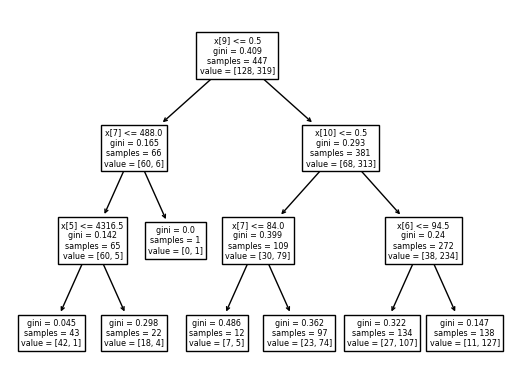

In [ ]:
tree.plot_tree(dt1)

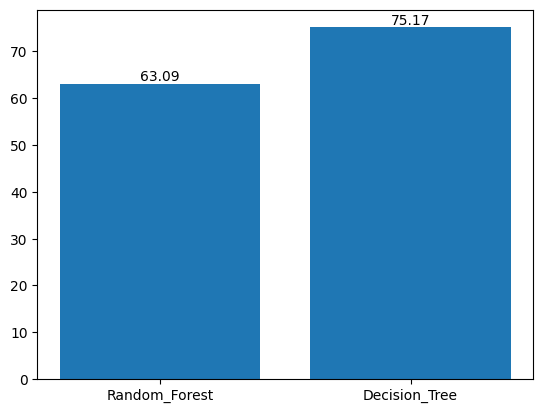

In [ ]:
results = [acc_rfc1,acc_dt1]
names = ['Random_Forest','Decision_Tree']
plt.bar(names,results)
for i, v in enumerate(results):
    plt.annotate(format((v), '.2f'), xy=(i, v), ha='center', va='bottom')

# **Applying AdaBoost and XGBBoost for boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
#Train another Random Forest classifier on the training set using AdaBoost
rf_ada = AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)
rf_ada.fit(X_train, Y_train)

#Evaluate the accuracy of the boosted classifier on the testing set
y_pred_ada = rf_ada.predict(X_test)
rf_ada_acc = accuracy_score(Y_test, y_pred_ada)
print('Random Forest with AdaBoost accuracy:', rf_ada_acc*100)

#Train another Random Forest classifier on the training set using XGBoost
rf_xgb = XGBClassifier(estimator=RandomForestClassifier(), n_estimators=100)
rf_xgb.fit(X_train, Y_train)

#Evaluate the accuracy of the boosted classifier on the testing set
y_pred_xgb = rf_xgb.predict(X_test)
rf_xgb_acc = accuracy_score(Y_test, y_pred_xgb)
print('Random Forest with XGBoost accuracy:', rf_xgb_acc*100)


Random Forest with AdaBoost accuracy: 76.51006711409396
Random Forest with XGBoost accuracy: 73.15436241610739
